# Bloque 5 Neurología: Práctica 5 - Procesamiento de señales de EEG

En esta práctica, nos adentraremos en el fascinante mundo del procesamiento de señales electroencefalográficas (EEG). El EEG es una herramienta crucial en la neurociencia y la ingeniería biomédica, ya que nos permite estudiar la actividad eléctrica del cerebro con gran detalle. A lo largo de esta sesión, exploraremos tres técnicas fundamentales para el análisis de señales EEG:

1. **Filtrado no lineal mediante señal de referencia**: Este método nos permitirá mejorar la calidad de las señales EEG al eliminar ruidos y artefactos no deseados, utilizando una señal de referencia para ajustar el filtrado de manera dinámica y precisa.

2. **Análisis mediante PSD (Densidad Espectral de Potencia)**: La PSD es una técnica que nos ayuda a entender cómo se distribuye la potencia de la señal EEG a través de diferentes frecuencias. Este análisis es esencial para identificar patrones específicos de actividad cerebral y para el diagnóstico de diversas condiciones neurológicas.

3. **Análisis mediante distribuciones tiempo-frecuencia**: Esta técnica combina el análisis temporal y frecuencial, proporcionando una visión más completa de cómo varían las características de la señal EEG a lo largo del tiempo. Utilizaremos herramientas como la Transformada de Wavelet para obtener representaciones detalladas de las señales en el dominio tiempo-frecuencia.

## Eliminación de Artefactos de Parpadeo en Señales EEG

Los artefactos de parpadeo son una de las fuentes más comunes de ruido en las señales EEG. Estos artefactos pueden interferir significativamente con el análisis de la actividad cerebral. Afortunadamente, existen técnicas efectivas para eliminar estos artefactos y mejorar la calidad de los datos EEG.

- **Filtrado Basado en Señales de Referencia**:
   - Utiliza señales de referencia, como el EOG (Electrooculograma), para identificar y eliminar los artefactos de parpadeo.
   - Este método ajusta dinámicamente el filtrado para eliminar el ruido sin afectar las señales EEG.

In [1]:
# pip install pyEDFlib
import scipy.io as scio  # Importa la biblioteca scipy.io para trabajar con archivos .mat.
import numpy as np  # Importa la biblioteca numpy para trabajar con matrices y funciones matemáticas.
import plotly.graph_objects as go  # Importa los objetos gráficos de Plotly para crear gráficos.
from plotly.subplots import make_subplots  # Importa la función para crear subplots en Plotly.

# Cargar los datos
EEG = scio.loadmat("Contaminated_Data.mat")  # Carga el archivo .mat con los datos de EEG contaminados.
EOG = scio.loadmat("HEOG.mat")  # Carga el archivo .mat con los datos de EOG.

xEEG = EEG["sim1_con"]  # Extrae los datos de EEG del archivo cargado.
xEOG = EOG["heog_1"]  # Extrae los datos de EOG del archivo cargado.

i = 0  # Índice para seleccionar una fila específica de los datos de EEG.

xEEG = xEEG[i, :]  # Selecciona la fila i de los datos de EEG.
xEOG = xEOG[0, :]  # Selecciona la primera fila de los datos de EOG.

# Crear subplots
fig = make_subplots(rows=1, cols=2)  # Crea una figura con 1 fila y 2 columnas de subplots.

# Añadir trazas
fig.add_trace(go.Scatter(y=xEEG, mode="lines", name="EEG"), row=1, col=1)  # Añade la traza de EEG al primer subplot.
fig.add_trace(go.Scatter(y=xEOG, mode="lines", name="EOG"), row=1, col=1)  # Añade la traza de EOG al primer subplot.

xCorr1 = np.mean(xEOG * xEOG)  # Calcula la correlación cruzada de EOG consigo mismo.
xCorr2 = np.mean(xEOG * xEEG)  # Calcula la correlación cruzada entre EOG y EEG.

w = xCorr2 / xCorr1 # Calcula el coeficiente de regresión para eliminar el artefacto de EOG del EEG.

EEG_limp = xEEG - w * xEOG # Elimina el artefacto de EOG del EEG.

fig.add_trace(go.Scatter(y=EEG_limp, mode="lines", name="EEG Sin EOG"), row=1, col=1)  # Añade la traza de EEG limpio al primer subplot.

fig.add_trace(
    go.Scatter(y=np.abs(EEG_limp - xEEG), mode="lines", name="Residuo"), row=1, col=2
)  # Añade la traza del residuo (diferencia entre EEG original y limpio) al segundo subplot.

# Mostrar gráfico
fig.show()  # Muestra la figura interactiva.

## Análisis mediante PSD (Densidad Espectral de Potencia)

El análisis de las etapas del sueño mediante la Densidad Espectral de Potencia (PSD) es una técnica fundamental en la investigación del sueño. La PSD nos permite entender cómo se distribuye la potencia de las señales EEG a través de diferentes frecuencias, lo cual es crucial para identificar y caracterizar las distintas etapas del sueño.

### Etapas del Sueño y sus Características en PSD

1. **Vigilia**:
   - Caracterizada por una alta actividad en las frecuencias beta (13-30 Hz) y alfa (8-12 Hz), especialmente cuando los ojos están cerrados y el sujeto está relajado.

2. **Sueño No REM (NREM)**:
   - **Etapa N1**: Caracterizada por una disminución de la actividad alfa (8-12 Hz) y un aumento de las frecuencias theta (4-7 Hz).
   - **Etapa N2**: Dominada por husos del sueño (12-14 Hz) y complejos K, con una reducción de la actividad alfa.
   - **Etapa N3**: Conocida como sueño profundo o de ondas lentas, presenta una alta potencia en las frecuencias delta (0.5-4 Hz).
   - **Etapa N4**: Similar a la etapa N3, con una mayor predominancia de las ondas delta, indicando un sueño aún más profundo y restaurador.

3. **Sueño REM (Rapid Eye Movement)**:
   - Caracterizado por una actividad de baja amplitud y mezcla de frecuencias, similar a la vigilia, pero con una notable reducción en las frecuencias delta y un aumento en las frecuencias beta (13-30 Hz).


In [2]:
# pip install pyEDFlib
import pyedflib  # Importa la biblioteca pyEDFlib para leer archivos EDF.
import numpy as np  # Importa la biblioteca numpy para trabajar con matrices y funciones matemáticas.
import scipy  # Importa la biblioteca scipy para funciones científicas y de ingeniería.
import plotly.graph_objects as go  # Importa los objetos gráficos de Plotly para crear gráficos.
from plotly.subplots import make_subplots  # Importa la función para crear subplots en Plotly.

# Datos de ejemplo para demostración
edf = pyedflib.EdfReader("SC4001E0-PSG.edf")  # Abre el archivo EDF con los datos de la señal.
hypnogram = pyedflib.EdfReader("SC4001EC-Hypnogram.edf")  # Abre el archivo EDF con los datos del hipnograma.
num_signals = edf.signals_in_file  # Obtiene el número de señales en el archivo EDF.

# Leer las señales
signals = []  # Lista para almacenar las señales.
labels = []  # Lista para almacenar las etiquetas de las señales.
for i in range(num_signals):
    signals.append(edf.readSignal(i))  # Lee cada señal y la añade a la lista de señales.
    labels.append(edf.getLabel(i))  # Lee la etiqueta de cada señal y la añade a la lista de etiquetas.

annotations = hypnogram.readAnnotations()  # Lee las anotaciones del hipnograma.

# Cerrar los archivos EDF
edf.close()  # Cierra el archivo EDF de las señales.
hypnogram.close()  # Cierra el archivo EDF del hipnograma.

annTime = annotations[0]  # Obtiene los tiempos de las anotaciones.
annLbl = annotations[2]  # Obtiene las etiquetas de las anotaciones.
lbls = np.unique(annLbl)  # Obtiene las etiquetas únicas de las anotaciones.
lbls = lbls[[0, 1, 2, 3, 5, 6]]  # Selecciona un subconjunto de etiquetas para graficar.
fs = 100  # Frecuencia de muestreo.

# Crear subplots
fig = make_subplots(rows=3, cols=2)  # Crea una figura con 3 filas y 2 columnas de subplots.

for i in range(len(lbls)):
    indice = annTime[np.where(annLbl == lbls[i])[0][0]].astype(int)  # Encuentra el índice de la primera aparición de cada etiqueta.
    signal = signals[1][indice : indice + 150]  # Obtiene un segmento de la señal correspondiente a la etiqueta.
    f, Pxx_den = scipy.signal.periodogram(signal, fs=fs,nfft=1024)  # Calcula el periodograma usando scipy.
    X = np.fft.fft(signal, n=1024)  # Calcula la FFT de la señal.
    Px = 1 / (fs * len(signal)) * np.abs(X) ** 2  # Calcula la densidad espectral de potencia (PSD).
    Px = Px[:513]  # Selecciona la mitad de las frecuencias (debido a la simetría de la FFT).
    Px[1:-1] = 2 * Px[1:-1]  # Ajusta la PSD para las frecuencias positivas.
    fx = np.linspace(0, int(fs / 2), int(1024 / 2) + 1)  # Crea un array de frecuencias.
    if i < 3:
        r = i + 1  # Determina la fila del subplot.
        c = 1  # Determina la columna del subplot.
    else:
        r = i - 2  # Ajusta la fila del subplot para las etiquetas restantes.
        c = 2  # Ajusta la columna del subplot para las etiquetas restantes.
    fig.add_trace(
        go.Scatter(x=fx, y=Px, mode="lines", name=lbls[i] + " Program"), row=r, col=c
    )  # Añade la traza del periodograma calculado manualmente al subplot correspondiente.
    fig.add_trace(
        go.Scatter(x=f, y=Pxx_den, mode="lines", name=lbls[i] + " Python"), row=r, col=c
    )  # Añade la traza del periodograma calculado con scipy al subplot correspondiente.
    fig.update_xaxes(title_text="Frecuencia (Hz)", row=3, col=2)  # Añade el título del eje x al subplot en la posición (3, 2).
    fig.update_yaxes(title_text="PSD", row=3, col=2)  # Añade el título del eje y al subplot en la posición (3, 2).

# Mostrar gráfico
fig.show()  # Muestra la figura interactiva.

### Barlett

In [3]:
# pip install pyEDFlib
import pyedflib  # Importa la biblioteca pyEDFlib para leer archivos EDF.
import numpy as np  # Importa la biblioteca numpy para trabajar con matrices y funciones matemáticas.
import scipy  # Importa la biblioteca scipy para funciones científicas y de ingeniería.
import plotly.graph_objects as go  # Importa los objetos gráficos de Plotly para crear gráficos.
from plotly.subplots import make_subplots  # Importa la función para crear subplots en Plotly.

# Datos de ejemplo para demostración
edf = pyedflib.EdfReader("SC4001E0-PSG.edf")  # Abre el archivo EDF con los datos de la señal.
hypnogram = pyedflib.EdfReader("SC4001EC-Hypnogram.edf")  # Abre el archivo EDF con los datos del hipnograma.
num_signals = edf.signals_in_file  # Obtiene el número de señales en el archivo EDF.

# Leer las señales
signals = []  # Lista para almacenar las señales.
labels = []  # Lista para almacenar las etiquetas de las señales.
for i in range(num_signals):
    signals.append(edf.readSignal(i))  # Lee cada señal y la añade a la lista de señales.
    labels.append(edf.getLabel(i))  # Lee la etiqueta de cada señal y la añade a la lista de etiquetas.

annotations = hypnogram.readAnnotations()  # Lee las anotaciones del hipnograma.

# Cerrar los archivos EDF
edf.close()  # Cierra el archivo EDF de las señales.
hypnogram.close()  # Cierra el archivo EDF del hipnograma.

annTime = annotations[0]  # Obtiene los tiempos de las anotaciones.
annLbl = annotations[2]  # Obtiene las etiquetas de las anotaciones.
lbls = np.unique(annLbl)  # Obtiene las etiquetas únicas de las anotaciones.
lbls = lbls[[0, 1, 2, 3, 5, 6]]  # Selecciona un subconjunto de etiquetas para graficar.
fs = 100  # Frecuencia de muestreo.

# Crear subplots
fig = make_subplots(rows=3, cols=2)  # Crea una figura con 3 filas y 2 columnas de subplots.
nfft = 256  # Número de puntos para la FFT.
K = 3  # Número de segmentos.
w = 50  # Tamaño de cada segmento.

for i in range(len(lbls)):
    indice = annTime[np.where(annLbl == lbls[i])[0][0]].astype(int)  # Encuentra el índice de la primera aparición de cada etiqueta.
    signal = signals[1][indice : indice + 150]  # Obtiene un segmento de la señal correspondiente a la etiqueta.
    Pxx_k = np.zeros((nfft // 2 + 1, K))  # Inicializa una matriz para almacenar los periodogramas de cada segmento.
    for k in range(K):
        segment = signal[k * w: (k + 1) * w]
        f, Pxx_k[:, k] = scipy.signal.periodogram(segment, fs, nfft=nfft)  # Calcula el periodograma del segmento.
    Pxx = np.mean(Pxx_k, axis=1)  # Promedia los periodogramas de los segmentos.

    if i < 3:
        r = i + 1  # Determina la fila del subplot.
        c = 1  # Determina la columna del subplot.
    else:
        r = i - 2  # Ajusta la fila del subplot para las etiquetas restantes.
        c = 2  # Ajusta la columna del subplot para las etiquetas restantes.
    fig.add_trace(
        go.Scatter(x=f, y=Pxx, mode="lines", name=lbls[i] + " Python"), row=r, col=c
    )  # Añade la traza del periodograma al subplot correspondiente.
    fig.update_xaxes(title_text="Frecuencia (Hz)", row=3, col=2)  # Añade el título del eje x al subplot en la posición (3, 2).
    fig.update_yaxes(title_text="PSD", row=3, col=2)  # Añade el título del eje y al subplot en la posición (3, 2).

# Mostrar gráfico
fig.show()  # Muestra la figura interactiva.

### Welch

In [4]:
# pip install pyEDFlib
import pyedflib  # Importa la biblioteca pyEDFlib para leer archivos EDF.
import numpy as np  # Importa la biblioteca numpy para trabajar con matrices y funciones matemáticas.
import scipy  # Importa la biblioteca scipy para funciones científicas y de ingeniería.
import plotly.graph_objects as go  # Importa los objetos gráficos de Plotly para crear gráficos.
from plotly.subplots import make_subplots  # Importa la función para crear subplots en Plotly.

def buffer(signal, n, p=0):
    """
    Buffer a signal into overlapping or non-overlapping segments.

    Parameters:
    signal (array-like): Input signal
    n (int): Number of samples per segment
    p (int, optional): Number of samples to overlap. Default is 0.

    Returns:
    y (numpy array): Buffered signal
    """
    step = n - p  # Calcula el paso entre segmentos.
    shape = (n, (len(signal) - p) // step)  # Define la forma del array de salida.
    strides = (signal.strides[0], step * signal.strides[0])  # Define los pasos en la memoria.
    y = np.lib.stride_tricks.as_strided(signal, shape=shape, strides=strides)  # Crea el array segmentado.

    return y

# Datos de ejemplo para demostración
edf = pyedflib.EdfReader("SC4001E0-PSG.edf")  # Abre el archivo EDF con los datos de la señal.
hypnogram = pyedflib.EdfReader("SC4001EC-Hypnogram.edf")  # Abre el archivo EDF con los datos del hipnograma.
num_signals = edf.signals_in_file  # Obtiene el número de señales en el archivo EDF.

# Leer las señales
signals = []  # Lista para almacenar las señales.
labels = []  # Lista para almacenar las etiquetas de las señales.
for i in range(num_signals):
    signals.append(edf.readSignal(i))  # Lee cada señal y la añade a la lista de señales.
    labels.append(edf.getLabel(i))  # Lee la etiqueta de cada señal y la añade a la lista de etiquetas.

annotations = hypnogram.readAnnotations()  # Lee las anotaciones del hipnograma.

# Cerrar los archivos EDF
edf.close()  # Cierra el archivo EDF de las señales.
hypnogram.close()  # Cierra el archivo EDF del hipnograma.

annTime = annotations[0]  # Obtiene los tiempos de las anotaciones.
annLbl = annotations[2]  # Obtiene las etiquetas de las anotaciones.
lbls = np.unique(annLbl)  # Obtiene las etiquetas únicas de las anotaciones.
lbls = lbls[[0, 1, 2, 3, 5, 6]]  # Selecciona un subconjunto de etiquetas para graficar.
fs = 100  # Frecuencia de muestreo.

# Crear subplots
fig = make_subplots(rows=3, cols=2)  # Crea una figura con 3 filas y 2 columnas de subplots.

for i in range(len(lbls)):
    indice = annTime[np.where(annLbl == lbls[i])[0][0]].astype(int)  # Encuentra el índice de la primera aparición de cada etiqueta.
    signal = signals[1][indice : indice + 150]  # Obtiene un segmento de la señal correspondiente a la etiqueta.
    signalBuf = buffer(signal, n=50, p=25)  # Segmenta la señal en ventanas superpuestas.
    f, Pxx_k = scipy.signal.periodogram(signalBuf, fs=fs, nfft=nfft, axis=0) # Calcula el periodograma de cada segmento
    Pxx_welch = np.mean(Pxx_k, axis=1)  # Promediar los periodogramas de los segmentos
    f, Pwelch = scipy.signal.welch(
        signal, fs, nfft=nfft, axis=0, window="boxcar", nperseg=25
    )  # Calcula el periodograma usando el método de Welch.
    if i < 3:
        r = i + 1  # Determina la fila del subplot.
        c = 1  # Determina la columna del subplot.
    else:
        r = i - 2  # Ajusta la fila del subplot para las etiquetas restantes.
        c = 2  # Ajusta la columna del subplot para las etiquetas restantes.
    fig.add_trace(
        go.Scatter(x=f, y=Pxx_welch, mode="lines", name=lbls[i] + " Manual"),
        row=r,
        col=c,
    )  # Añade la traza del periodograma calculado manualmente al subplot correspondiente.
    fig.add_trace(
        go.Scatter(x=f, y=Pwelch, mode="lines", name=lbls[i] + " Welch"),
        row=r,
        col=c,
    )  # Añade la traza del periodograma calculado con el método de Welch al subplot correspondiente.
    fig.update_xaxes(title_text="Frecuencia (Hz)", row=3, col=2)  # Añade el título del eje x al subplot en la posición (3, 2).
    fig.update_yaxes(title_text="PSD", row=3, col=2)  # Añade el título del eje y al subplot en la posición (3, 2).

# Mostrar gráfico
fig.show()  # Muestra la figura interactiva.

In [5]:
# pip install pyEDFlib
import pyedflib  # Importa la biblioteca pyEDFlib para leer archivos EDF.
import numpy as np  # Importa la biblioteca numpy para trabajar con matrices y funciones matemáticas.
import scipy  # Importa la biblioteca scipy para funciones científicas y de ingeniería.
import plotly.graph_objects as go  # Importa los objetos gráficos de Plotly para crear gráficos.
from plotly.subplots import make_subplots  # Importa la función para crear subplots en Plotly.

def buffer(signal, n, p=0):
    """
    Buffer a signal into overlapping or non-overlapping segments.

    Parameters:
    signal (array-like): Input signal
    n (int): Number of samples per segment
    p (int, optional): Number of samples to overlap. Default is 0.

    Returns:
    y (numpy array): Buffered signal
    """
    step = n - p  # Calcula el paso entre segmentos.
    shape = (n, (len(signal) - p) // step)  # Define la forma del array de salida.
    strides = (signal.strides[0], step * signal.strides[0])  # Define los pasos en la memoria.
    y = np.lib.stride_tricks.as_strided(signal, shape=shape, strides=strides)  # Crea el array segmentado.

    return y

# Datos de ejemplo para demostración
edf = pyedflib.EdfReader("SC4001E0-PSG.edf")  # Abre el archivo EDF con los datos de la señal.
hypnogram = pyedflib.EdfReader("SC4001EC-Hypnogram.edf")  # Abre el archivo EDF con los datos del hipnograma.
num_signals = edf.signals_in_file  # Obtiene el número de señales en el archivo EDF.

# Leer las señales
signals = []  # Lista para almacenar las señales.
labels = []  # Lista para almacenar las etiquetas de las señales.
for i in range(num_signals):
    signals.append(edf.readSignal(i))  # Lee cada señal y la añade a la lista de señales.
    labels.append(edf.getLabel(i))  # Lee la etiqueta de cada señal y la añade a la lista de etiquetas.

annotations = hypnogram.readAnnotations()  # Lee las anotaciones del hipnograma.

# Cerrar los archivos EDF
edf.close()  # Cierra el archivo EDF de las señales.
hypnogram.close()  # Cierra el archivo EDF del hipnograma.

annTime = annotations[0]  # Obtiene los tiempos de las anotaciones.
annLbl = annotations[2]  # Obtiene las etiquetas de las anotaciones.
lbls = np.unique(annLbl)  # Obtiene las etiquetas únicas de las anotaciones.
lbls = lbls[[0, 1, 2, 3, 5, 6]]  # Selecciona un subconjunto de etiquetas para graficar.
fs = 100  # Frecuencia de muestreo.

# Crear subplots
fig = make_subplots(rows=3, cols=2)  # Crea una figura con 3 filas y 2 columnas de subplots.

for i in range(len(lbls)):
    indice = annTime[np.where(annLbl == lbls[i])[0][0]].astype(int)  # Encuentra el índice de la primera aparición de cada etiqueta.
    signal = signals[1][indice : indice + 150]  # Obtiene un segmento de la señal correspondiente a la etiqueta.
    signalBuf = buffer(signal, n=50, p=25)  # Segmenta la señal en ventanas superpuestas.
    f, Pxx_k[:, k] = scipy.signal.periodogram(signalBuf[:, k], fs=fs, nfft=nfft)  # Calcula el periodograma de cada segmento
    Pxx_welch = np.mean(Pxx_k, axis=1)  # Promediar los periodogramas de los segmentos
    f, Pwelch = scipy.signal.welch(
        signal, fs, nfft=nfft, axis=0, window="boxcar", nperseg=25
    )  # Calcula el periodograma usando el método de Welch.
    if i < 3:
        r = i + 1  # Determina la fila del subplot.
        c = 1  # Determina la columna del subplot.
    else:
        r = i - 2  # Ajusta la fila del subplot para las etiquetas restantes.
        c = 2  # Ajusta la columna del subplot para las etiquetas restantes.
    fig.add_trace(
        go.Scatter(x=f, y=Pxx_welch, mode="lines", name=lbls[i] + " Manual"),
        row=r,
        col=c,
    )  # Añade la traza del periodograma calculado manualmente al subplot correspondiente.
    fig.add_trace(
        go.Scatter(x=f, y=Pwelch, mode="lines", name=lbls[i] + " Welch"),
        row=r,
        col=c,
    )  # Añade la traza del periodograma calculado con el método de Welch al subplot correspondiente.
    fig.update_xaxes(title_text="Frecuencia (Hz)", row=3, col=2)  # Añade el título del eje x al subplot en la posición (3, 2).
    fig.update_yaxes(title_text="PSD", row=3, col=2)  # Añade el título del eje y al subplot en la posición (3, 2).

# Mostrar gráfico
fig.show()  # Muestra la figura interactiva.

### Blackman-Tukey

In [6]:
# pip install pyEDFlib
import pyedflib  # Importa la biblioteca pyEDFlib para leer archivos EDF.
import numpy as np  # Importa la biblioteca numpy para trabajar con matrices y funciones matemáticas.
import scipy  # Importa la biblioteca scipy para funciones científicas y de ingeniería.
import plotly.graph_objects as go  # Importa los objetos gráficos de Plotly para crear gráficos.
from plotly.subplots import make_subplots  # Importa la función para crear subplots en Plotly.

# Datos de ejemplo para demostración
edf = pyedflib.EdfReader("SC4001E0-PSG.edf")  # Abre el archivo EDF con los datos de la señal.
hypnogram = pyedflib.EdfReader("SC4001EC-Hypnogram.edf")  # Abre el archivo EDF con los datos del hipnograma.
num_signals = edf.signals_in_file  # Obtiene el número de señales en el archivo EDF.

# Leer las señales
signals = []  # Lista para almacenar las señales.
labels = []  # Lista para almacenar las etiquetas de las señales.
for i in range(num_signals):
    signals.append(edf.readSignal(i))  # Lee cada señal y la añade a la lista de señales.
    labels.append(edf.getLabel(i))  # Lee la etiqueta de cada señal y la añade a la lista de etiquetas.

annotations = hypnogram.readAnnotations()  # Lee las anotaciones del hipnograma.

# Cerrar los archivos EDF
edf.close()  # Cierra el archivo EDF de las señales.
hypnogram.close()  # Cierra el archivo EDF del hipnograma.

annTime = annotations[0]  # Obtiene los tiempos de las anotaciones.
annLbl = annotations[2]  # Obtiene las etiquetas de las anotaciones.
lbls = np.unique(annLbl)  # Obtiene las etiquetas únicas de las anotaciones.
lbls = lbls[[0, 1, 2, 3, 5, 6]]  # Selecciona un subconjunto de etiquetas para graficar.
fs = 100  # Frecuencia de muestreo.

# Crear subplots
fig = make_subplots(rows=3, cols=2)  # Crea una figura con 3 filas y 2 columnas de subplots.

for i in range(len(lbls)):
    indice = annTime[np.where(annLbl == lbls[i])[0][0]].astype(int)  # Encuentra el índice de la primera aparición de cada etiqueta.
    signal = signals[1][indice : indice + 150]  # Obtiene un segmento de la señal correspondiente a la etiqueta.
    
    # Calcular la autocorrelación
    autocorr = np.correlate(signal, signal, mode="full") # Calcula la autocorrelación de la señal.
    n = len(signal)  # Longitud de la señal.
    M = n // 2  # Mitad de la longitud de la señal.
    autocorr = autocorr[n - 1 : n + M]  # Selecciona la parte relevante de la autocorrelación.
    
    # Aplicar ventana triangular
    window = np.bartlett(len(autocorr))  # Crea una ventana triangular (Bartlett) del mismo tamaño que la autocorrelación.
    autocorr = autocorr * window # Aplica la ventana triangular a la autocorrelación.
    
    # Calcular la PSD usando FFT
    X = np.fft.fft(autocorr, n=1024) # Calcula la FFT de la autocorrelación.
    Px = 1 / (fs * len(autocorr)) * np.abs(X) ** 2  # Calcula la densidad espectral de potencia (PSD).
    Px = Px[:513]  # Selecciona la mitad de las frecuencias (debido a la simetría de la FFT).
    Px[1:-1] = 2 * Px[1:-1]  # Ajusta la PSD para las frecuencias positivas.
    fx = np.linspace(0, int(fs / 2), int(1024 / 2) + 1)  # Crea un array de frecuencias.
    
    if i < 3:
        r = i + 1  # Determina la fila del subplot.
        c = 1  # Determina la columna del subplot.
    else:
        r = i - 2  # Ajusta la fila del subplot para las etiquetas restantes.
        c = 2  # Ajusta la columna del subplot para las etiquetas restantes.
    
    fig.add_trace(go.Scatter(x=fx, y=Px, mode="lines", name=lbls[i]), row=r, col=c)  # Añade la traza del periodograma al subplot correspondiente.
    fig.update_xaxes(title_text="Frecuencia (Hz)", row=3, col=2)  # Añade el título del eje x al subplot en la posición (3, 2).
    fig.update_yaxes(title_text="PSD", row=3, col=2)  # Añade el título del eje y al subplot en la posición (3, 2).

# Mostrar gráfico
fig.show()  # Muestra la figura interactiva.

## Distribuciones tiempo-frecuencia 
Las transformaciones tiempo-frecuencia son herramientas fundamentales en el análisis de señales no estacionarias. Permiten representar una señal en un dominio conjunto de tiempo y frecuencia, proporcionando una visión más completa de sus características. A continuación, se presentan algunas de las transformaciones más importantes:

### Transformada de Fourier de Tiempo Corto (STFT)

La **Transformada de Fourier de Tiempo Corto (STFT)** divide la señal en segmentos de tiempo y aplica la Transformada de Fourier a cada segmento. Esto permite observar cómo las frecuencias de la señal cambian con el tiempo.

### Distribución de Wigner-Ville (WVD)

La **Distribución de Wigner-Ville (WVD)** es una representación tiempo-frecuencia que ofrece una alta resolución tanto en tiempo como en frecuencia. Sin embargo, puede generar interferencias cruzadas que dificultan la interpretación.

### Distribución de Pseudo Wigner-Ville  (PWVD)

La **Distribución de Pseudo Wigner-Ville (PWVD)** es una variante de la WVD que utiliza una ventana para reducir las interferencias cruzadas, mejorando la claridad de la representación tiempo-frecuencia.

### Clases de Cohen

Las **Clases de Cohen** son una familia de distribuciones tiempo-frecuencia que generalizan la WVD. Incluyen diversas transformaciones que permiten ajustar la representación según las necesidades específicas del análisis de la señal.

#### Señales Reales
Las señales reales tienen componentes de frecuencia tanto positivas como negativas que son simétricas. Cuando aplicas la WVD a una señal real, estos componentes pueden interferir entre sí, lo que lleva a aliasing y términos cruzados que hacen que la representación tiempo-frecuencia sea menos clara.

Esta interferencia ocurre porque la WVD es una distribución tiempo-frecuencia cuadrática, lo que significa que involucra productos de la señal consigo misma en diferentes momentos. Para las señales reales, esto puede resultar en componentes de frecuencia superpuestas que causan aliasing.

#### Señales Complejas
Las señales complejas, particularmente las señales analíticas, solo tienen componentes de frecuencia positivas. La señal analítica se obtiene tomando la señal original y añadiendo su transformada de Hilbert, lo que elimina efectivamente los componentes de frecuencia negativos.

Cuando aplicas la WVD a una señal compleja, no hay componentes de frecuencia negativas que interfieran con las positivas, resultando en una representación tiempo-frecuencia más clara y sin aliasing.

#### Uso de la Transformada de Hilbert
Para evitar el aliasing al aplicar la WVD a señales reales, puedes convertir la señal real en una señal analítica usando la transformada de Hilbert.


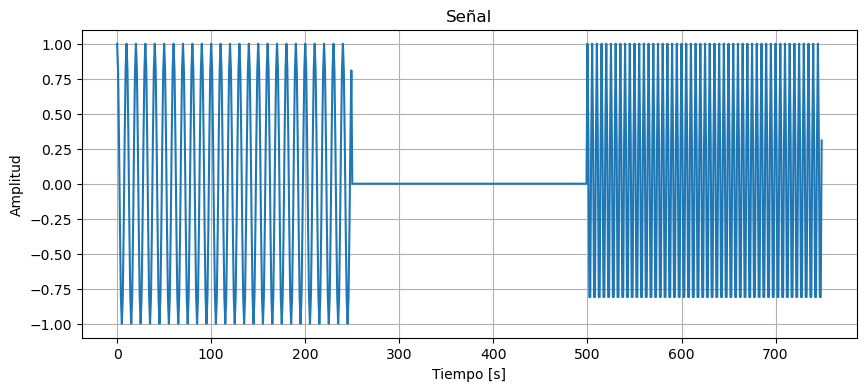

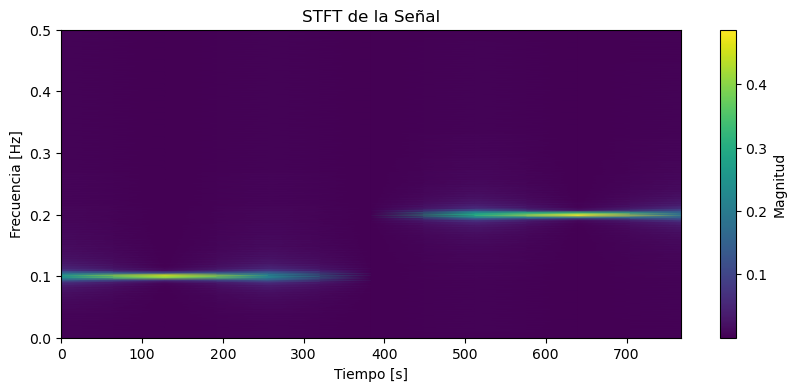

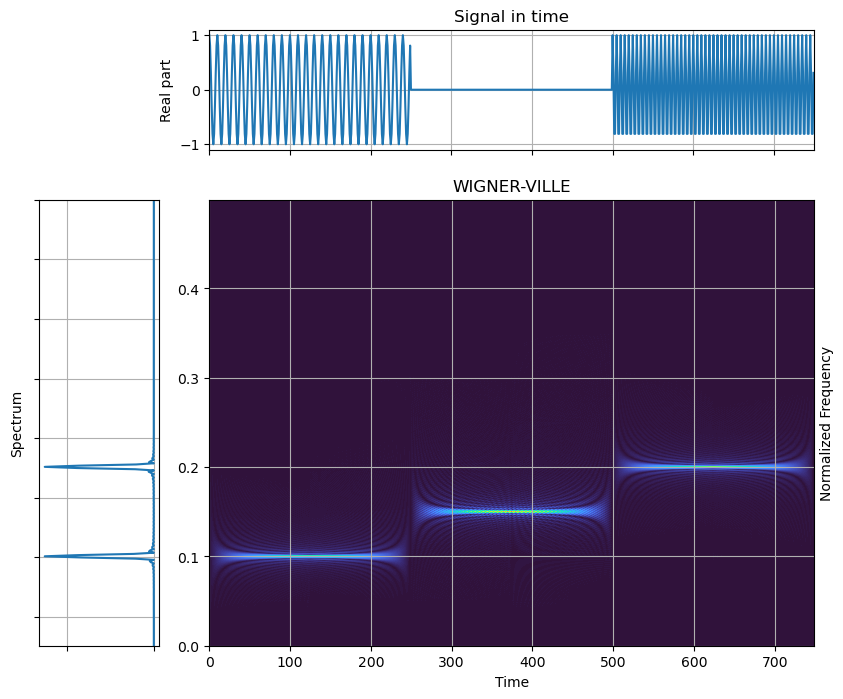

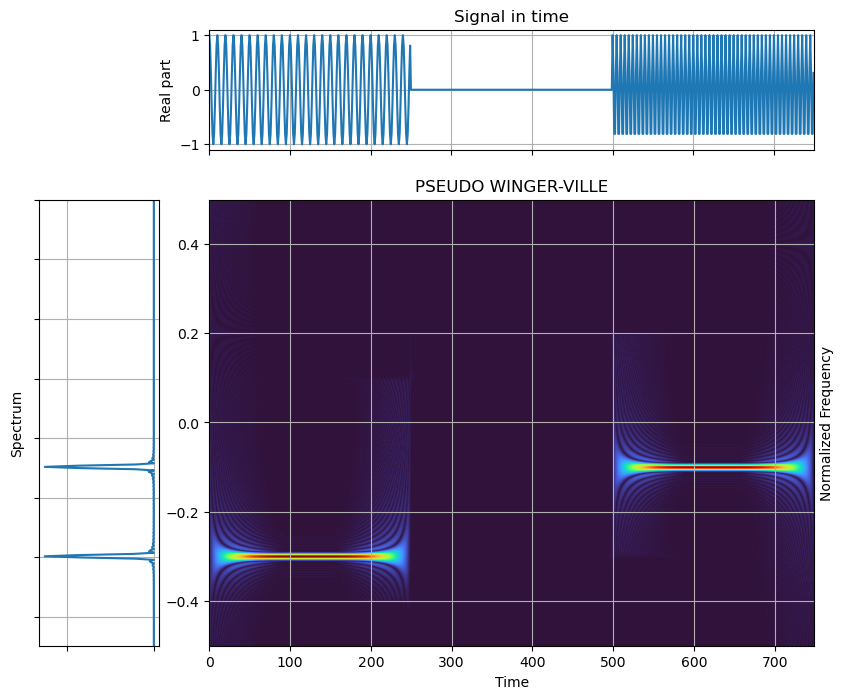

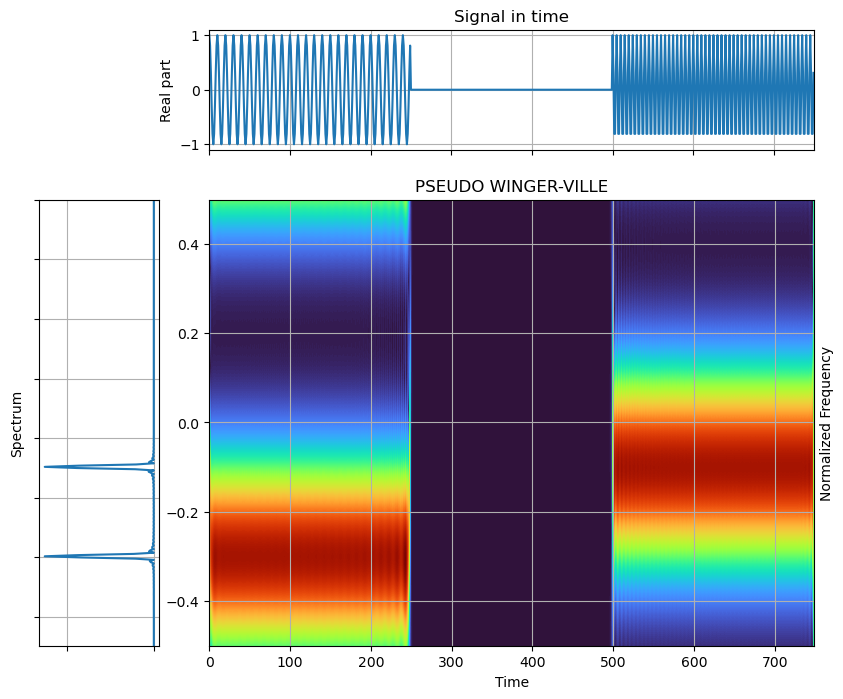

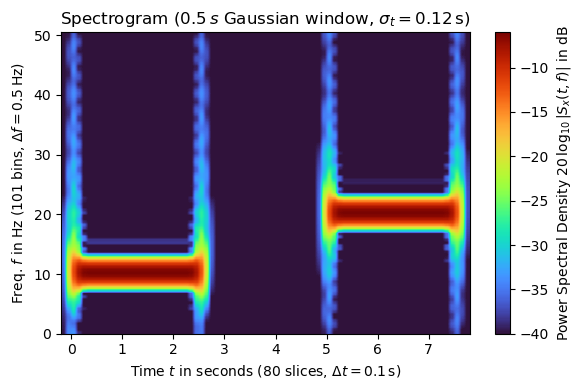

In [ ]:
# pip install tftb (Dará un error, cambiar todos los trapz por trapezoid, 2º Error from scipy.signal.windows import hamming, añadir el windows)
import numpy as np  # Importa la biblioteca numpy para trabajar con matrices y funciones matemáticas.
import matplotlib.pyplot as plt  # Importa la biblioteca matplotlib para crear gráficos.
from scipy.signal import (
    stft,
)  # Importa la función stft para calcular la Transformada de Fourier de Tiempo Corto.
from scipy.signal import (
    hilbert,
)  # Importa la función hilbert para calcular la transformada de Hilbert.
from tftb.processing import (  # Importa las clases para calcular las distribuciones de Wigner-Ville.
    WignerVilleDistribution,
    PseudoWignerVilleDistribution,
)
from scipy.signal.windows import (
    gaussian,
)  # Importa la función gaussian para crear ventanas gaussianas.
from scipy.signal import (
    ShortTimeFFT,
)  # Importa la clase ShortTimeFFT para calcular el espectrograma.

# Generar una señal chirp
fs = 50  # Frecuencia de muestreo.
f0 = 5  # Frecuencia inicial del chirp.
f1 = 10  # Frecuencia final del chirp.
t = np.arange(0, 5, 1 / fs)  # Vector de tiempo.
sig1 = np.cos(2 * np.pi * t * f0)  # Genera la primera parte de la señal chirp.
sig2 = 0 * sig1  # Genera la segunda parte de la señal (silencio).
sig3 = np.cos(2 * np.pi * t * f1)  # Genera la tercera parte de la señal chirp.
signal = np.hstack((sig1, sig2, sig3))  # Combina las tres partes de la señal.
t = np.arange(0, len(signal))  # Vector de tiempo para la señal completa.
analytic_signal = hilbert(
    signal
)  # Calcula la señal analítica usando la transformada de Hilbert.

# Parámetros de la ventana gaussiana
M = len(analytic_signal)  # Número de puntos en la ventana.
std = 1  # Desviación estándar.

# Crear la ventana gaussiana
window = gaussian(M // 4, std)  # Crea una ventana gaussiana.

# Plot de la señal chirp
plt.figure(figsize=(10, 4))  # Crea una figura de tamaño 10x4.
plt.plot(np.arange(len(signal)), signal)  # Grafica la señal.
plt.title("Señal")  # Añade el título al gráfico.
plt.xlabel("Tiempo [s]")  # Añade la etiqueta del eje x.
plt.ylabel("Amplitud")  # Añade la etiqueta del eje y.
plt.grid()  # Añade una cuadrícula al gráfico.
plt.show()  # Muestra el gráfico.

# Transformada de Fourier de Tiempo Corto (STFT)
f, t_stft, Zxx = stft(signal)  # Calcula la STFT de la señal.
plt.figure(figsize=(10, 4))  # Crea una figura de tamaño 10x4.
plt.pcolormesh(t_stft, f, np.abs(Zxx), shading="gouraud")  # Grafica el espectrograma.
plt.title("STFT de la Señal")  # Añade el título al gráfico.
plt.xlabel("Tiempo [s]")  # Añade la etiqueta del eje x.
plt.ylabel("Frecuencia [Hz]")  # Añade la etiqueta del eje y.
plt.colorbar(label="Magnitud")  # Añade una barra de color con la etiqueta "Magnitud".
plt.show()  # Muestra el gráfico.

# Distribución de Wigner-Ville (WVD)
wvd = WignerVilleDistribution(
    analytic_signal
)  # Crea una instancia de la clase WignerVilleDistribution.
wvd.run()  # Calcula la distribución de Wigner-Ville.

# Plot de la distribución de Wigner-Ville unidireccional
wvd.plot(
    show_tf=True, kind="cmap", threshold=0, cmap="turbo"
)  # Grafica la distribución de Wigner-Ville.

# Distribución de Wigner-Ville Pseudo (PWVD)
pwvd = PseudoWignerVilleDistribution(
    analytic_signal
)  # Crea una instancia de la clase PseudoWignerVilleDistribution.
tfr, times, freqs = pwvd.run()  # Calcula la distribución de Wigner-Ville Pseudo.
pwvd.plot(
    show_tf=True, kind="cmap", threshold=0, cmap="turbo"
)  # Grafica la distribución de Wigner-Ville Pseudo.

# Distribución de Wigner-Ville Pseudo (PWVD) + ventana
pwvd = PseudoWignerVilleDistribution(
    analytic_signal, fwindow=window
)  # Crea una instancia de la clase PseudoWignerVilleDistribution con una ventana gaussiana.
pwvd.run()  # Calcula la distribución de Wigner-Ville Pseudo con ventana.
pwvd.plot(
    show_tf=True, kind="cmap", threshold=0, cmap="turbo"
)  # Grafica la distribución de Wigner-Ville Pseudo con ventana.

# Distribución de Spectrograma
g_std = 12  # Desviación estándar para la ventana gaussiana en muestras.
w = gaussian(50, std=g_std, sym=True)  # Crea una ventana gaussiana simétrica.
N = len(signal)  # Longitud de la señal.
SFT = ShortTimeFFT(
    w, hop=10, fs=100, mfft=200, scale_to="magnitude"
)  # Crea una instancia de la clase ShortTimeFFT.
Sx2 = SFT.spectrogram(signal)  # Calcula el espectrograma de la señal.
fig1, ax1 = plt.subplots(figsize=(6.0, 4.0))  # Crea una figura de tamaño 6x4.
t_lo, t_hi = SFT.extent(N)[:2]  # Rango de tiempo del gráfico.
ax1.set_title(
    rf"Spectrogram ({SFT.m_num*SFT.T:g}$\,s$ Gaussian "
    + rf"window, $\sigma_t={g_std*SFT.T:g}\,$s)"
)  # Añade el título al gráfico.
ax1.set(
    xlabel=f"Time $t$ in seconds ({SFT.p_num(N)} slices, "
    + rf"$\Delta t = {SFT.delta_t:g}\,$s)",
    ylabel=f"Freq. $f$ in Hz ({SFT.f_pts} bins, "
    + rf"$\Delta f = {SFT.delta_f:g}\,$Hz)",
    xlim=(t_lo, t_hi),
)  # Añade las etiquetas y límites a los ejes.
Sx_dB = 10 * np.log10(np.fmax(Sx2, 1e-4))  # Limita el rango a -40 dB.
im1 = ax1.imshow(
    Sx_dB, origin="lower", aspect="auto", extent=SFT.extent(N), cmap="turbo"
)  # Grafica el espectrograma.
fig1.colorbar(
    im1, label="Power Spectral Density " + r"$20\,\log_{10}|S_x(t, f)|$ in dB"
)  # Añade una barra de color con la etiqueta "Power Spectral Density".
fig1.tight_layout()  # Ajusta el diseño de la figura.
plt.show()  # Muestra el gráfico.

### Ejemplo sobre señales reales


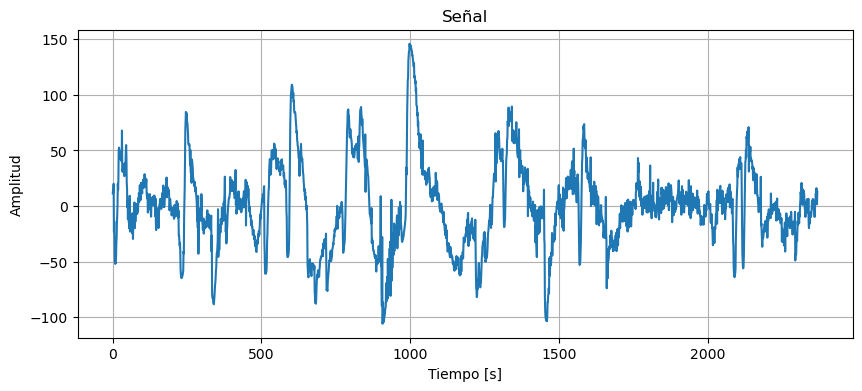

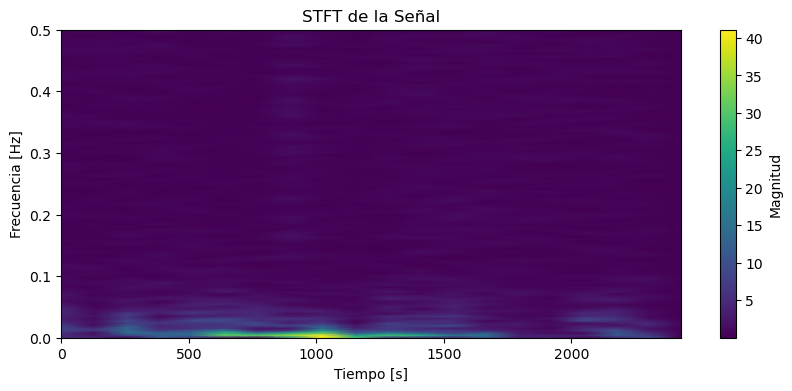

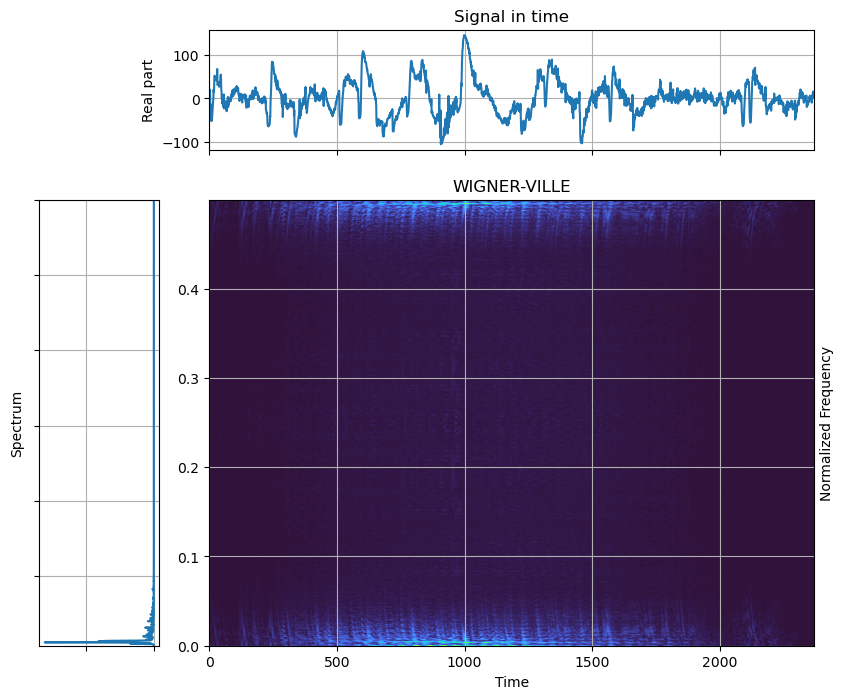

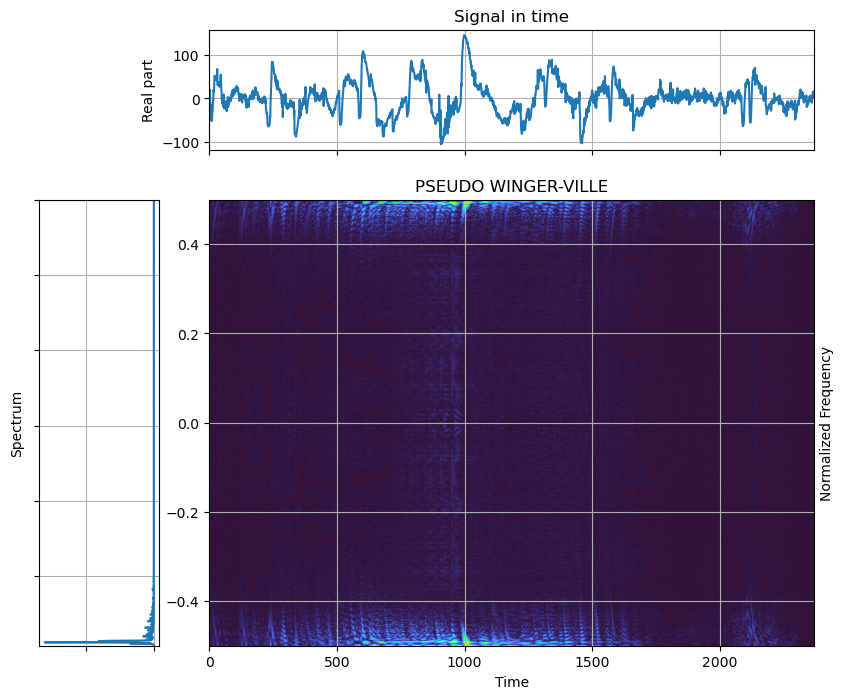

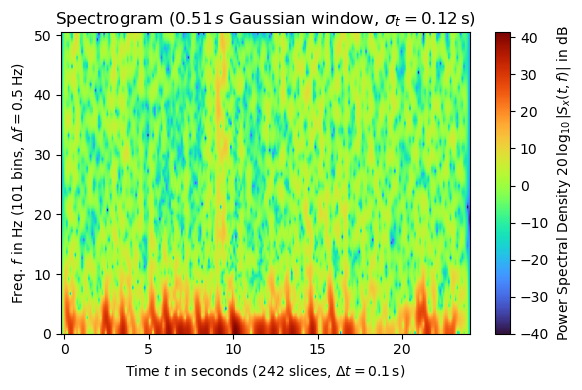

In [8]:
# pip install tftb (Dará un error, cambiar todos los trapz por trapezoid, 2º Error from scipy.signal.windows import hamming, añadir el windows)
import numpy as np  # Importa la biblioteca numpy para trabajar con matrices y funciones matemáticas.
import matplotlib.pyplot as plt  # Importa la biblioteca matplotlib para crear gráficos.
from scipy.signal import stft, windows  # Importa la función stft para calcular la Transformada de Fourier de Tiempo Corto.
from scipy.signal import hilbert  # Importa la función hilbert para calcular la transformada de Hilbert.
from tftb.processing import (  # Importa las clases para calcular las distribuciones de Wigner-Ville.
    WignerVilleDistribution,
    PseudoWignerVilleDistribution
)
from scipy.signal.windows import gaussian  # Importa la función gaussian para crear ventanas gaussianas.
import pyedflib  # Importa la biblioteca pyEDFlib para leer archivos EDF.
import plotly.graph_objects as go  # Importa los objetos gráficos de Plotly para crear gráficos.
from plotly.subplots import make_subplots  # Importa la función para crear subplots en Plotly.

# Datos de ejemplo para demostración
edf = pyedflib.EdfReader("SC4001E0-PSG.edf")  # Abre el archivo EDF con los datos de la señal.
hypnogram = pyedflib.EdfReader("SC4001EC-Hypnogram.edf")  # Abre el archivo EDF con los datos del hipnograma.
num_signals = edf.signals_in_file  # Obtiene el número de señales en el archivo EDF.

# Leer las señales
signals = []  # Lista para almacenar las señales.
labels = []  # Lista para almacenar las etiquetas de las señales.
for i in range(num_signals):
    signals.append(edf.readSignal(i))  # Lee cada señal y la añade a la lista de señales.
    labels.append(edf.getLabel(i))  # Lee la etiqueta de cada señal y la añade a la lista de etiquetas.

annotations = hypnogram.readAnnotations()  # Lee las anotaciones del hipnograma.

# Cerrar los archivos EDF
edf.close()  # Cierra el archivo EDF de las señales.
hypnogram.close()  # Cierra el archivo EDF del hipnograma.

annTime = annotations[0]  # Obtiene los tiempos de las anotaciones.
annLbl = annotations[2]  # Obtiene las etiquetas de las anotaciones.
fs = 100  # Frecuencia de muestreo.
on = int(annTime[34])  # Tiempo de inicio de la señal de interés.
off = int(annTime[41])  # Tiempo de fin de la señal de interés.
t = np.arange(on, off)  # Vector de tiempo para la señal de interés.
signal = signals[0][on:off]  # Extrae la señal de interés.
analytic_signal = hilbert(signal)  # Calcula la señal analítica usando la transformada de Hilbert.

# Plot de la señal chirp
plt.figure(figsize=(10, 4))  # Crea una figura de tamaño 10x4.
plt.plot(np.arange(len(signal)), signal)  # Grafica la señal.
plt.title("Señal")  # Añade el título al gráfico.
plt.xlabel("Tiempo [s]")  # Añade la etiqueta del eje x.
plt.ylabel("Amplitud")  # Añade la etiqueta del eje y.
plt.grid()  # Añade una cuadrícula al gráfico.
plt.show()  # Muestra el gráfico.

# Transformada de Fourier de Tiempo Corto (STFT)
f, t_stft, Zxx = stft(signal)  # Calcula la STFT de la señal.
plt.figure(figsize=(10, 4))  # Crea una figura de tamaño 10x4.
plt.pcolormesh(t_stft, f, np.abs(Zxx), shading="gouraud")  # Grafica el espectrograma.
plt.title("STFT de la Señal")  # Añade el título al gráfico.
plt.xlabel("Tiempo [s]")  # Añade la etiqueta del eje x.
plt.ylabel("Frecuencia [Hz]")  # Añade la etiqueta del eje y.
plt.colorbar(label="Magnitud")  # Añade una barra de color con la etiqueta "Magnitud".
plt.show()  # Muestra el gráfico.

# Distribución de Wigner-Ville (WVD)
wvd = WignerVilleDistribution(signal) # Crea una instancia de la clase WignerVilleDistribution.
wvd.run()  # Calcula la distribución de Wigner-Ville.

# Plot de la distribución de Wigner-Ville unidireccional
wvd.plot(show_tf=True, kind="cmap", threshold=0, cmap="turbo")  # Grafica la distribución de Wigner-Ville.

# Distribución de Wigner-Ville Pseudo (PWVD)
pwvd = PseudoWignerVilleDistribution(signal) # Crea una instancia de la clase PseudoWignerVilleDistribution.
pwvd.run()  # Calcula la distribución de Wigner-Ville Pseudo.
pwvd.plot(show_tf=True, kind="cmap", cmap="turbo", threshold=0)  # Grafica la distribución de Wigner-Ville Pseudo.

# Distribución de Spectrograma
g_std = 12  # Desviación estándar para la ventana gaussiana en muestras.
w = gaussian(51, std=g_std) # Crea una ventana gaussiana simétrica.
N = len(signal)  # Longitud de la señal.
SFT = ShortTimeFFT(
    w, hop=10, fs=100, mfft=200, scale_to="magnitude"
)  # Crea una instancia de la clase ShortTimeFFT.
Sx2 = SFT.spectrogram(signal)  # Calcula el espectrograma de la señal.
fig1, ax1 = plt.subplots(figsize=(6.0, 4.0))  # Crea una figura de tamaño 6x4.
t_lo, t_hi = SFT.extent(N)[:2]  # Rango de tiempo del gráfico.
ax1.set_title(
    rf"Spectrogram ({SFT.m_num*SFT.T:g}$\,s$ Gaussian "
    + rf"window, $\sigma_t={g_std*SFT.T:g}\,$s)"
)  # Añade el título al gráfico.
ax1.set(
    xlabel=f"Time $t$ in seconds ({SFT.p_num(N)} slices, "
    + rf"$\Delta t = {SFT.delta_t:g}\,$s)",
    ylabel=f"Freq. $f$ in Hz ({SFT.f_pts} bins, "
    + rf"$\Delta f = {SFT.delta_f:g}\,$Hz)",
    xlim=(t_lo, t_hi),
)  # Añade las etiquetas y límites a los ejes.
Sx_dB = 10 * np.log10(np.fmax(Sx2, 1e-4))  # Limita el rango a -40 dB.
im1 = ax1.imshow(
    Sx_dB, origin="lower", aspect="auto", extent=SFT.extent(N), cmap="turbo"
)  # Grafica el espectrograma.
fig1.colorbar(
    im1, label="Power Spectral Density " + r"$20\,\log_{10}|S_x(t, f)|$ in dB"
)  # Añade una barra de color con la etiqueta "Power Spectral Density".
fig1.tight_layout()  # Ajusta el diseño de la figura.
plt.show()  # Muestra el gráfico.